In [1]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

print(np.__version__)
SEED = 42

1.26.4


In [2]:
def sigmoid(z):
    "Applies the sigmoid math-function on the input"
    return 1 / (1 + np.exp(-z))

In [3]:
sigmoid(0)

0.5

In [4]:
np.random.seed(SEED)
# dummy_1 = np.random.rand(10)
# dummy_2 = np.random.rand(10)

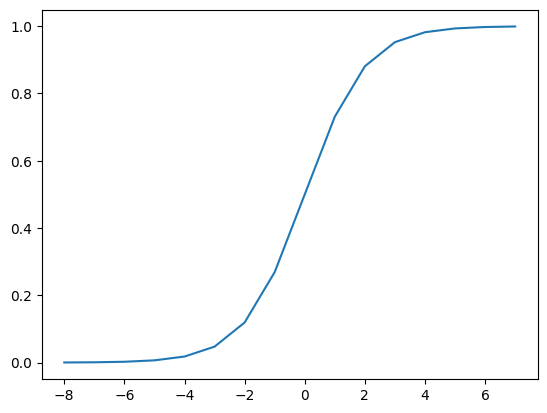

In [5]:
# Intuition
x_dummy = np.arange(-8, 8,)
y_dummy = sigmoid(x_dummy)
fig, ax = plt.subplots()
ax.plot(x_dummy, y_dummy)

## DATA

In [33]:
X, y = load_breast_cancer(return_X_y=True)
print(X.shape, y.shape)
print(X.size, y.size)

(569, 30) (569,)
17070 569


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2,
                                                    random_state=SEED)
(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

((455, 30), (455,), (114, 30), (114,))

## 🤖

In [8]:
class LogisticRegression:
    "Logistic Regression Class"
    def __init__(self, lr: int, n_iters: int):
        self.learning_rate = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def _sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        n_samples, n_features = X.shape
        # Initialize parameters
        self.weights = np.zeros(n_features)
        self.bias = 0
        # Gradient Descent
        for _ in range(self.n_iters):
            linear_output_model = np.dot(X, self.weights) + self.bias
            y_pred = self._sigmoid(linear_output_model)
            # Gradients..
            dj_dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            dj_db = (1 / n_samples) * np.sum(y_pred - y)
            # Parameter Upadate
            self.weights -= self.learning_rate * dj_dw
            self.bias -= self.learning_rate * dj_db

        print("Fitted")

    def predict(self, X):
        linear_model_output = np.dot(X, self.weights) + self.bias
        y_pred = self._sigmoid(linear_model_output)
        y_pred_class = [1 if i > 0.5 else 0 for i in y_pred]
        return np.array(y_pred_class)

In [9]:
regressor = LogisticRegression(lr=1e-3, n_iters=1000)

In [26]:
regressor.fit(X_train, y_train)

C:\Users\abyss\AppData\Local\Temp\ipykernel_20584\2586929960.py:10: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


Fitted


The above warning involves the exp exceeds the floating point limit, to combat this problem:
```
np.exp(np.clip(z, None, 709)) <- This is a solution
```


In [27]:
y_pred_ = regressor.predict(X_test)
print(list(y_pred_))

[0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0]


C:\Users\abyss\AppData\Local\Temp\ipykernel_20584\2586929960.py:10: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


In [28]:
def accuracy(y_true, y_pred):
    return np.sum(y_true == y_pred) / len(y_true)


In [29]:
print(f"Accuracy: {accuracy(y_test, y_pred_):.4f}%")

Accuracy: 0.9474%


In [14]:
print(X_test.shape, y_test.shape)
print(X_test.size, y_test.size)

(114, 30) (114,)
3420 114


# Intuition Plotting

In [31]:
X_dummy = np.linspace(-10, 10, 100) # Feature Value
ypreds_dummy = 1 / (1 + np.exp(-X_dummy))

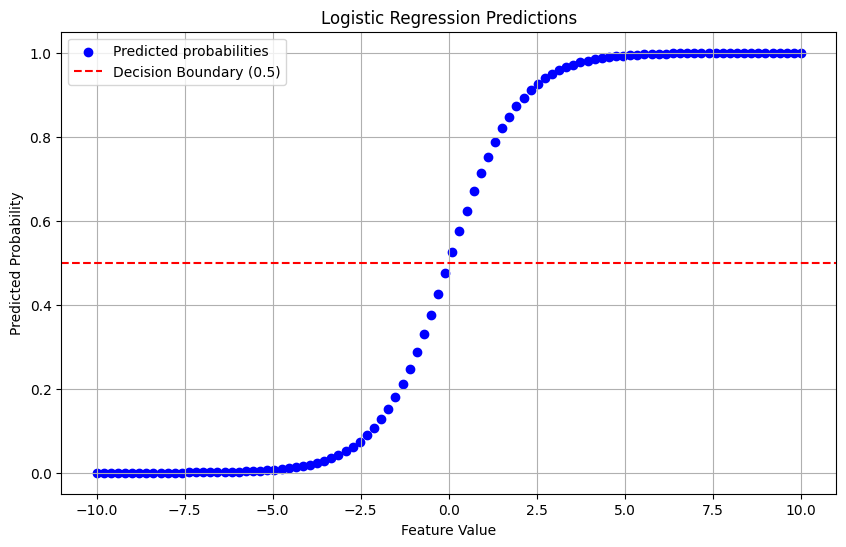

In [21]:
plt.figure(figsize=(10, 6))
plt.scatter(X_dummy, ypreds_dummy, color='blue', label='Predicted probabilities')
plt.title('Logistic Regression Predictions')
plt.xlabel('Feature Value')
plt.ylabel('Predicted Probability')
plt.axhline(y=0.5, color='r', linestyle='--', label='Decision Boundary (0.5)')
plt.legend()
plt.grid()
plt.show()